In [1]:
# ruff: noqa: E402
%run _common.ipynb
%matplotlib inline

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from node_homotopy.synchronization import CouplingTerm
from node_homotopy.schedules import PowerLawStepwiseSchedule
from node_homotopy.training import HomotopyTraining
from node_homotopy.experiments.common import make_trainer
from node_homotopy.experiments.double_pendulum import (
    make_pendulum_dataset,
    make_pendulum_model,
)

## Create the dataset for training

In [2]:
dataset = make_pendulum_dataset()

## Create schedule for the homotopy optimization

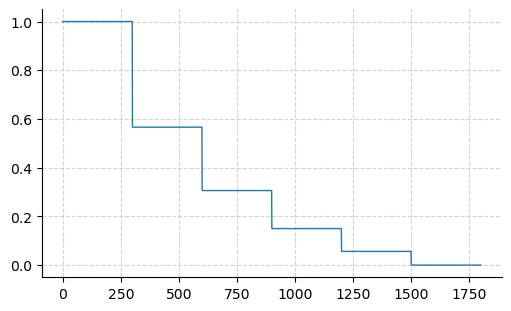

In [3]:
schedule = PowerLawStepwiseSchedule(6, 300, 0.6)
epochs = torch.arange(schedule.max_epochs)
homotopy_param = torch.tensor([schedule(ep) for ep in epochs])

fig, ax = plt.subplots()
ax.plot(epochs, homotopy_param)

In [4]:
neuralode = make_pendulum_model(model_type="secondorder")
coupling = CouplingTerm.from_dataset(dataset, k=10.0)
homotopy = HomotopyTraining(neuralode, 1e-3, coupling, schedule)

/home/jhko725/mambaforge/envs/homotopy/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'coupling_term' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['coupling_term'])`.


In [5]:
dataloader = DataLoader(dataset, batch_size=1, num_workers=8, pin_memory=True)

trainer = make_trainer(max_epochs=4000, logger=None)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/jhko725/mambaforge/envs/homotopy/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [6]:
trainer.fit(homotopy, dataloader)

You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                 | Params
-------------------------------------------------------
0 | model         | SecondOrderBlackbox  | 2.9 K 
1 | loss_function | MSELoss              | 0     
2 | model_sync    | SynchronizedDynamics | 2.9 K 
-------------------------------------------------------
2.9 K     Trainable params
1         Non-trainable params
2.9 K     Total params
0.012     Total estimated model params size (MB)


Epoch 2:   0%|          | 0/1 [00:00<?, ?it/s, v_num=3, train_loss=11.00, lambda=1.000, mse=42.40]        

/home/jhko725/mambaforge/envs/homotopy/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
